# Predictive Maintenance for Industrial Machines
- **Challenge**: Create a predictive maintenance model to anticipate machinery failures.
- **Deliverables**: A Jupyter Notebook with data exploration, feature selection, predictive modeling, and validation. A presentation summarizing the approach, the model's predictive performance, and maintenance recommendations.
- **Data Source**: *Predictive Maintenance dataset* from Microsoft.

# 1. Obtain the Dataset
The dataset simulates logging of a manufacturing machine's parameters as a function of time, which is common in industrial settings. It consists of 10,000 data points stored as rows with features as columns. 

You can download this dataset from https://synapseaisolutionsa.blob.core.windows.net/public/MachineFaultDetection/predictive_maintenance.csv

In [1]:
# hint: install Pyarrow library with "pip" to avoid the deprecation warning
import pandas as pd

# read the CSV file using pandas library to create a new dataframe (df)
df = pd.read_csv("predictive_maintenance.csv")

# duplicate the df to avoid the warning "A value is trying to be set on a copy of a slice from a DataFrame."
df = df.copy()

# print dataframe shape
print (df.shape)

#show top 10 data
df.head(10)

(10000, 10)


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
5                    1425         41.9               11       0   No Failure  
6                    1558         42.4               14       0   No Failure  
7                    1527         40.2               16       0   No Failure  
8                    1667         28.6               18       0   No Failure  
9                    1741         28.0               21       0   No Failure

# 2. Data Cleaning
Before we can use the data, we need to preprocess it. This typically involves handling missing values, encoding categorical variables, and creating the RFM features.

In [2]:
# Check the columns data types. Are they all correct?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [3]:
# Data exploration: how many "Null" rows do we have? And Where?
pd.set_option('display.max_rows', None) # needed to display all columns
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# 3. Data Exploration
Here are some suggested metrics to visualize:
- 3.1) Summary Statistics
- 3.2) Histogram: Show the Distribution of Target Variable
- 3.3) Time Series Analysis: plot the number of purchases over time (e.g., daily, weekly, or monthly)
- 3.4) Word cloud: use the "itemDescription" column to visualize the most commonly occurring words

In [4]:
# 3.1) Summary Statistics:  
# - Calculate basic summary statistics such as mean, median, mode, standard deviation, etc., for the numerical columns 
# Air temperature [K], Rotational speed [rpm] and Torque [Nm]

# - Compute summary statistics like count, unique items, top item, and frequency for the categorical columns 
# "Product ID" and "Type".

# Provide the number of elements for each different Type

import pandas as pd
  
# Numerical columns  
numerical_cols = df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]"]]  
# Calculate summary statistics for numerical columns  
numerical_stats = numerical_cols.describe() 
  
# Categorical columns  
categorical_cols = df[["Product ID", "Type"]]
  
# Compute summary statistics for categorical columns  
categorical_stats = categorical_cols.describe()


# Count the number of elements for each different "Type"  
type_counts = df["Type"].value_counts()
  
# Print the summary statistics  
print(f"Summary Statistics for Numerical Columns:\n{numerical_stats}\n")
print(f"Summary Statistics for Categorical Columns:\n{categorical_stats}\n")
print(f"Type counts:\n{type_counts}")

Summary Statistics for Numerical Columns:
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  
count  10000.000000  
mean      39.986910  
std        9.968934  
min        3.800000  
25%       33.200000  
50%       40.100000  
75%       46.800000  
max       76.600000  

Summary Statistics for Categorical Columns:
   

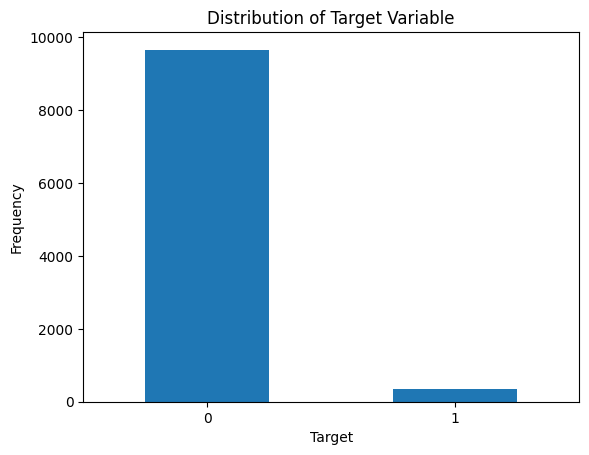

In [5]:
# 3.2) Distribution of Target Variable: Create a histogram or bar plot  
# to visualize the distribution of the target variable "Target". 
# This will give you an overview of the proportion of machinery failures in the dataset.

import pandas as pd  
import matplotlib.pyplot as plt
  
# Plot the distribution of the target variable
# df['Target'].plot(kind='bar')  
# plt.bar(df['Target'], freq)
df['Target'].value_counts().plot.bar()
plt.title('Distribution of Target Variable')  
plt.xlabel('Target')  
plt.ylabel('Frequency')  
plt.xticks(rotation=0)
plt.show()

In [6]:
# 3.3) Correlation Heatmap: Generate a correlation heatmap to visualize the relationships between different  
# numerical variables (e.g., "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", 
# "Torque [Nm]", "Tool wear [min]"). 
# This will help you identify any significant correlations between variables, which can be useful for feature selection. 

import pandas as pd  
import seaborn as sns  # requires pip install seaborn 
import matplotlib.pyplot as plt  
  
# Select the numerical variables for correlation analysis  
numerical_vars = df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", 
                     "Torque [Nm]", "Tool wear [min]"]] 
  
# Compute the correlation matrix  
correlation_matrix = numerical_vars.corr() 
correlation_matrix

Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.876107   
Process temperature [K]             0.876107                 1.000000   
Rotational speed [rpm]              0.022670                 0.019277   
Torque [Nm]                        -0.013778                -0.014061   
Tool wear [min]                     0.013853                 0.013488   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
Air temperature [K]                    0.022670    -0.013778         0.013853  
Process temperature [K]                0.019277    -0.014061         0.013488  
Rotational speed [rpm]                 1.000000    -0.875027         0.000223  
Torque [Nm]                           -0.875027     1.000000        -0.003093  
Tool wear [min]                        0.000223    -0.003093         1.000000

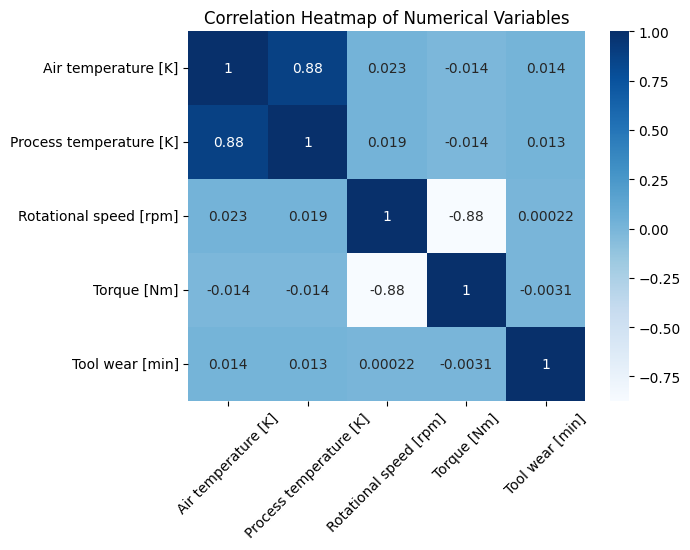

In [18]:
# Generate the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap = "Blues")  
plt.title('Correlation Heatmap of Numerical Variables')  
plt.xticks(rotation=45)
plt.show() 

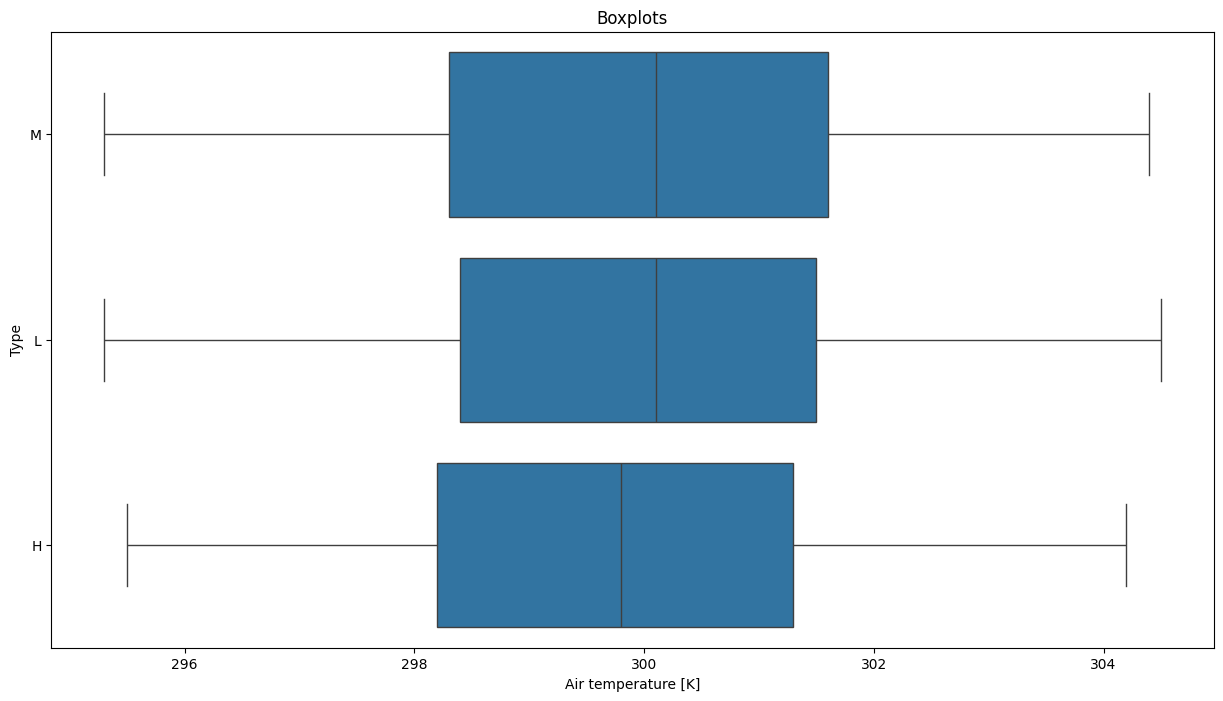

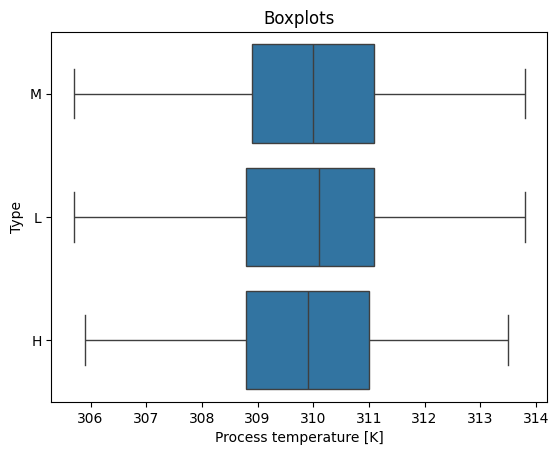

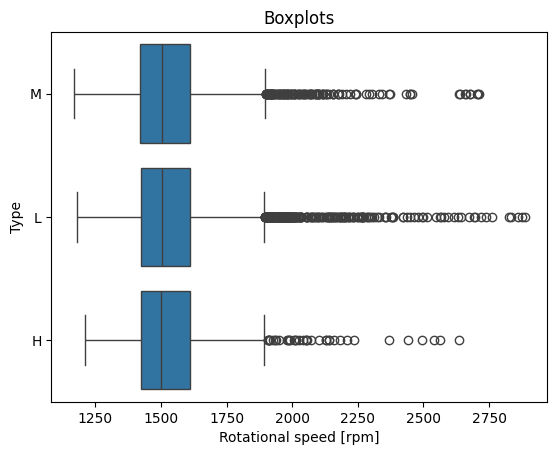

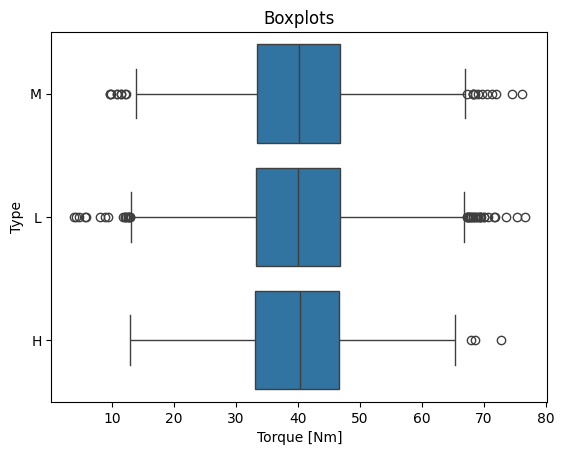

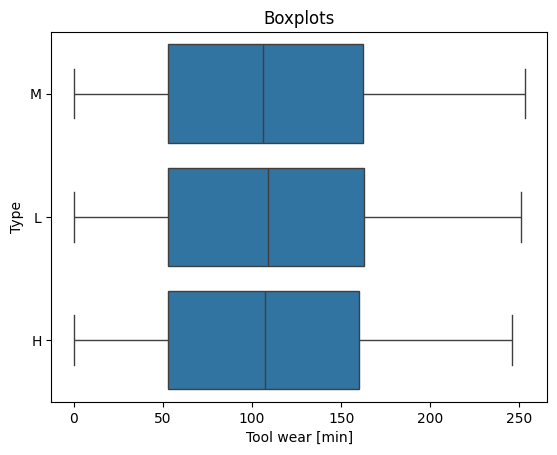

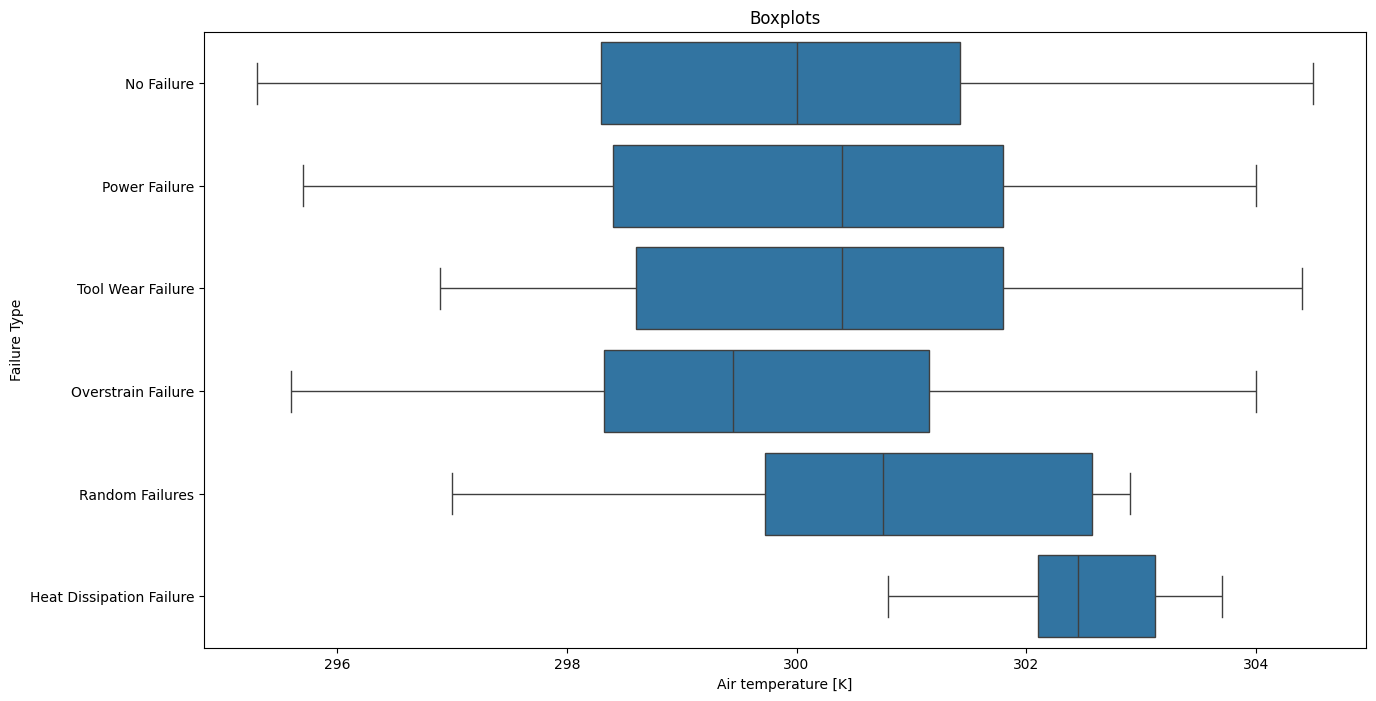

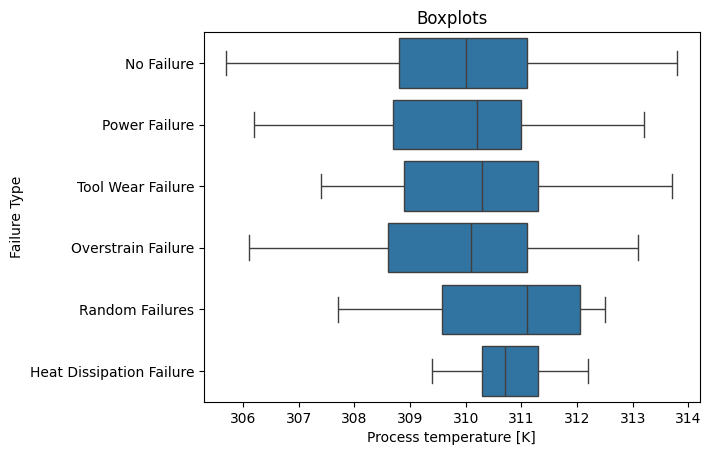

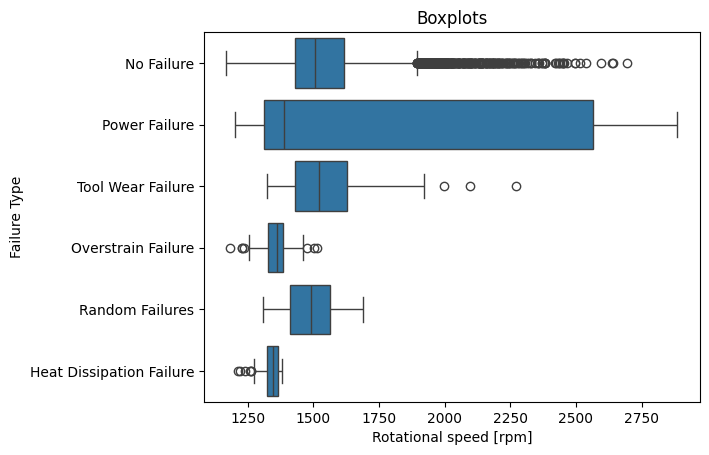

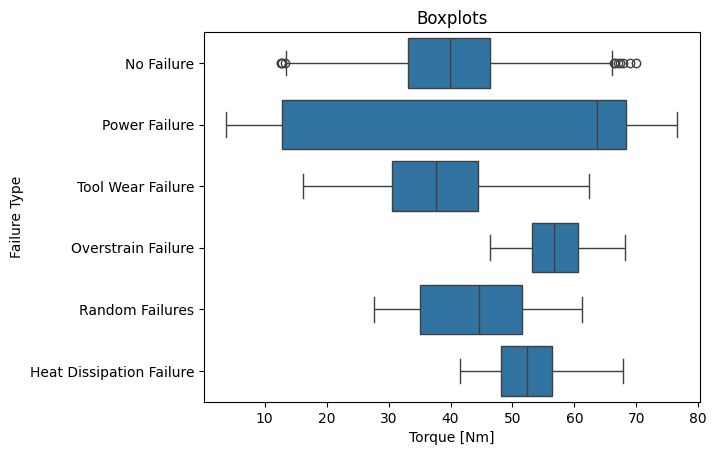

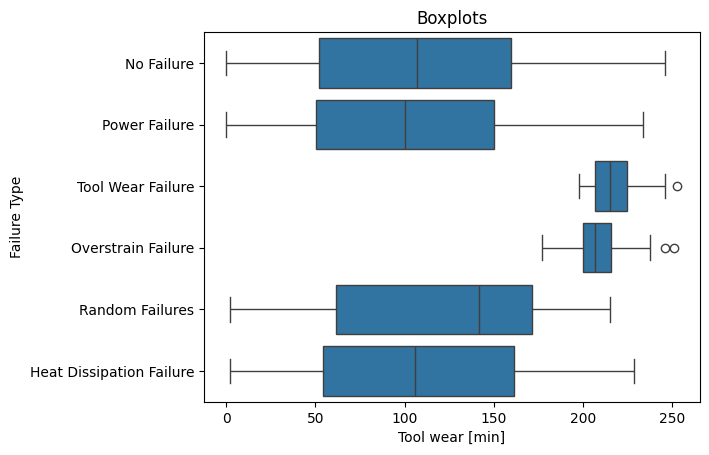

In [8]:
# 4) Box Plots: Create box plots to visualize the distribution of numerical variables 
# (e.g., "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", 
# "Tool wear [min]") for different categories of the categorical variables (e.g., "Type", "Failure Type"). 
# This can provide insights into how different factors affect machinery failures.

# This code will load the dataset and create separate box plots for each numerical variable, grouped by each categorical 
# variable. The x-axis represents the categorical variable, and the y-axis represents the numerical variable. 
# Each box plot shows the distribution of the numerical variable for different categories of the categorical variable. 
# This visualization will provide insights into how different factors, such as the type of machinery or failure type, affect the distribution of numerical variables and potentially impact machinery failures.

import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
  
# Select the numerical and categorical variables for box plots  
numerical_vars = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", 
                     "Torque [Nm]", "Tool wear [min]"]
categorical_vars = ["Type", "Failure Type"] # type and failure type
  
# Create box plots for numerical variables grouped by categorical variables  
for cat_var in categorical_vars:  
    plt.figure(figsize=(15, 8))  
    for num_var in numerical_vars:
        sns.boxplot(x = num_var, y = cat_var, data=df)
        plt.title("Boxplots")
#        ...
#        ...
#        ... 
        plt.show()

## 4. Building Classification Machine Learning Model
- 4.1 Create and fill two variables: features and label
- 4.2 Training and Test Dataset Split
- 4.3 Use the Random Forest classifier Algorithm to Build the Model

In [51]:
# 4.1 Create and fill two variables: features and label  
# features: "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]" 
# label = "Target"  # Assuming "Target" is the binary classification target variable

features = df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", 
               "Torque [Nm]", "Tool wear [min]"]]
label = df[["Target"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [23]:
# 4.2 Training and Test Dataset Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)
[d.shape for d in (X_train, X_test, y_train, y_test)]

[(8000, 5), (2000, 5), (8000, 1), (2000, 1)]

In [80]:
# 4.3 Use the Random Forest classifier Algorithm to Build the Model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
  
# Train the model  
model.fit(X_train, y_train)

/Users/liza/miniconda3/envs/my_env_3_10/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

## 5. Score the Model

In [81]:
# Make predictions on the test set  
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 6. Evaluate the Model 

In [82]:
from sklearn.metrics import accuracy_score # We use accuracy_score from sklearn library to calcuate the accuracy of our model.

# y_test are the true values from the data and y_pred are the predicted values by the model.
accuracy = accuracy_score(y_test, y_pred) 

# The accuracy shows how many predictions were done right by our model. The accuracy ranges between 0 (the lowest) and 1 (the highest). 
print("Accuracy:", accuracy) # We got the accuracy of 98% which means that our model is pretty accurate as it predicted 98% of the values correctly.

Accuracy: 0.9835


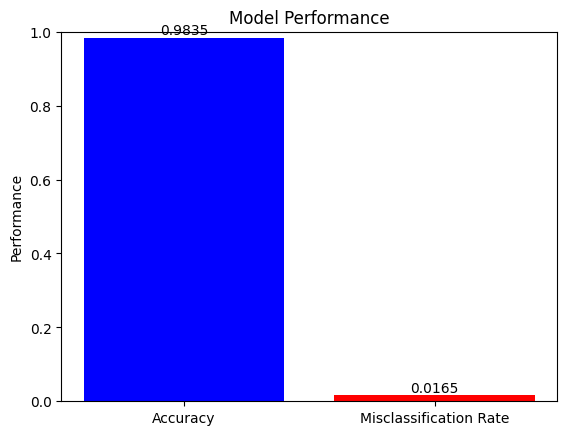

In [91]:
misclassification_rate = 1 - accuracy
# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(['Accuracy', 'Misclassification Rate'], [accuracy, misclassification_rate], color=['blue', 'red'])

# Add the numeric value on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 4), ha='center', va='bottom')

# Add titles and labels
ax.set_ylabel('Performance')
ax.set_title('Model Performance')
ax.set_ylim(0, 1)  # Set y-axis limit from 0 to 1

# Show plot
plt.show()

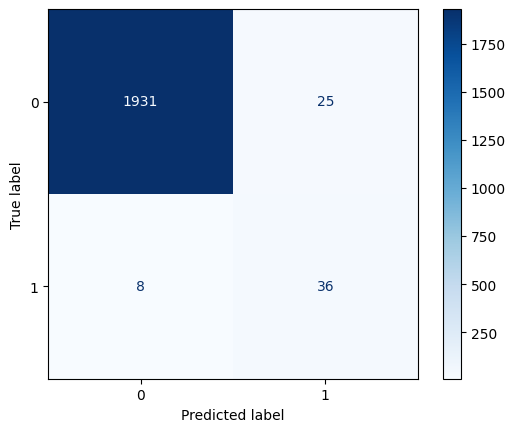

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # We use confusion_matrix and ConfusionMatrixDisplayfrom sklearn library to display a confusion matrix.

# The confusion matrix gives a summary of correct and incorrect predictions broken down by our targte variable which is Target. 
conf_mat = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot(cmap=plt.cm.Blues) # We have 1931 correctly predicted 0 values and 36 correctly predicted 1 values.

Text(0, 0.5, 'Feature Importance Score')

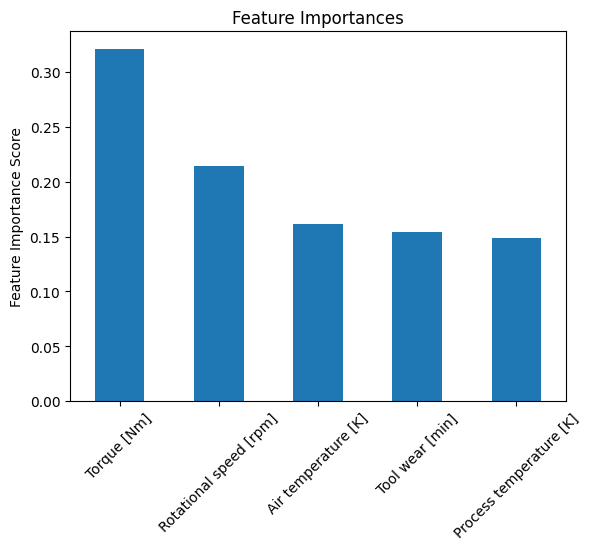

In [90]:
# The feature importances graph shows which features were most taken into consideration by the model when predicting.
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False) 
feature_importances.plot.bar()
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.ylabel('Feature Importance Score')
# The Torque was the biggest predictor in whether the machinery failure happened or not.

In [79]:
from sklearn.metrics import classification_report # We use classification_report from sklearn library to get the classification report for our model.

# The classification report displays the precision, recall, f1 and support scores for our model.
print(classification_report(y_test, y_pred))
# Precision shows that in 99% of cases the model correctly identified machinery 'success' and in 82% it correctly identified machinery failure.
# Recall shows that 100% of machinery 'successes' were identified correctly out of all predicted 'successes'. 59% of machinery failures were identified correctly out of all predicted failures.
# The F1 score for machinery 'successes' (99%) is higher than for failures (69%) which means that our models predicts 'successes' better.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.82      0.59      0.69        61

    accuracy                           0.98      2000
   macro avg       0.90      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

